# Trading Strategies and the BT Package

> I think that good quant investment managers … can really be thought of as financial economists who have codified their beliefs into a repeatable process. They are distinguished by diversification, sticking to their process with discipline, and the ability to engineer portfolio characteristics. 
— Cliff Asness of AQR (2007)

These notes are based, in part, of Chapter 3.3 of [Efficiently Inefficient by Lasse Pedersen](https://press.princeton.edu/books/hardcover/9780691166193/efficiently-inefficient). It is a nice introduction to more sophisticated investing strategies, like quantitative equity and fixed income arbitrage strategies. I provide many more resources below.  

Broadly speaking, **quantitative investing** tries to turn a investment thesis into a repeatable process. The thesis is often **model driven**, perhaps related to some economic rationale that repeats itself. For example, maybe stocks with certain characteristics generate positive risk-adjusted returns, on average. 

This process often means using **historical** or **simulated** data to test a hypothesis. This process is called **backtesting** -- there's an entire literature that has developed around the best way to backtest strategies. We'll discuss the basic idea here.

Quantitative strategies, regardless of security type, usually have a small amount of alpha per trade. These are not "big swings", like betting against housing in 2007. The model identifies **entry and exit points across a large number of securities**, leading to significant **diversification**, or at least that's the hope.

If you can identify something in the data, then you can trade on it. This might be traditional measures, like value and momentum. Other accounting data gets used to create measures like earnings quality. You can try to quantify management quality. You can look at flow in and out of security, trying to identify who is trading. You can use the limit order book itself. You can use natural language processing (NLP) and text data. I give you some examples below. 

Some quantitative trading strategies are very short-term and high turnover, like those that use the limit order book. Others hold securities for months, if not years, like value. 

Many strategies have a **long and short component**. You buy a basket of securities (e.g. stocks, currencies, crypto, etc.) that have the positive set of characteristics that you're looking at and short a basic of securities that have the negative set. Going long and short can help mitigate risk, but there's a lot that goes into it. Exactly how should you weight your positions? Should you try to be market beta neutral in you overall portfolio? What about sector bets? Going long deep value will have you buying lots and lots of bank stocks. How do you feel about that kind of concentration?

The end-goal: create a portfolio with the risks and characteristics that you want, while eliminating that ones that you don't want. This, somewhat optimistically, is sometimes called a **market neutral portfolio**. Like an equity market neutral hedge fund -- they try to make money no matter what the overall market is doing. Quants try to estimate the relation between the signal value and the expected return and construct the portfolio and the rebalancing strategy that maximizes performance after transaction costs.

For differences between risk factors and anomalies, see the chapter on factor models. Both could be present in a quantitative trading portfolio. Understand your market to know what the risks and anomalies are. It is often hard (impossible?) to know which is which.

## Steps in Strategy Development

Here are a typical set of steps for developing a quantitative trading strategy.

1. **Identify a hypothesis or market inefficiency**: Develop a hypothesis about a market inefficiency that your strategy will exploit. This could be based on trends, patterns, or relationships between financial instruments or market data. **This is the hard part!** If you want to do this for real, I strongly suggest trying to find a niche market, something without a lot of volume, something too small for larger investors to trade in. You are very unlikely to have any kind of advantage trading U.S. equities. You could try to re-create one of the well-known strategies used by some [factor-based ETFs](https://www.blackrock.com/us/financial-professionals/products/factor-etfs#Minimum-Volatility), but you will be at a trading-cost disadvantage.

2. **Gather and preprocess data**: Collect relevant historical data for your hypothesis, such as price, volume, and other financial indicators. Preprocess the data to ensure it is clean and consistent, accounting for issues like missing values, outliers, and data errors. This crucial step is why we spent so much time mucking around in `pandas` looking for **NA** values and [bad dates](https://www.youtube.com/watch?v=0qIMTA4_YdU). What are your data sources? Do you have a data advantage? Everyone has moved to [alternative data](https://data.nasdaq.com/alternative-data) the past decade, with varying degrees of success. Data costs get very expensive, very quickly. Even just having a Bloomberg terminal is going to be too much for an individual investor. **Play in markets where you don't need one.**
   
3. **Feature engineering and selection**: Create features or variables (features are the machine learning way of saying "variable") that capture relevant information for your strategy. This could include technical indicators, fundamental analysis, or sentiment analysis. Perform feature selection to identify the most important variables for your strategy. Steps 2 and 3 are the **data engineering** steps. These jobs often [pay more](https://www.efinancialcareers.com/news/2023/03/quant-developers-vs-quant-researchers) than the hypothesis development roles!
   
4. **Develop a trading model**: Use your selected features to build a quantitative model. This could involve statistical methods, machine learning techniques, or optimization algorithms. Split your data into training and testing sets to avoid overfitting and to assess your model's performance. Most of these models are "off the shelf" these days. In other words, there's little alpha in fancy math. **Linear regression** and logit are commonly used. Even the fanciest machine learning techniques available have already been coded up in Python (or another language) by our friend's in the computer science world. Still, different techniques come in and out of fashion, so the quant researcher wants to stay up on what's going on. Then, we just go back to calculating conditional means in our OLS model. 

5. **Backtesting**: Test your strategy on historical data to evaluate its performance. This step is crucial to determine if the strategy would have been profitable in the past. Assess various performance metrics, such as the Sharpe ratio, maximum drawdown, and annualized returns. **These notes focus on this step**. We are going to use the [bt package](https://pypi.org/project/bt/). There's obviously much more that goes into it. 

6. **Risk management**: Incorporate risk management rules to protect your capital and minimize losses. This could include position sizing, stop-loss orders, and diversification techniques.

7. **Optimization and sensitivity analysis**: Optimize your strategy's parameters and perform sensitivity analysis to assess its robustness. Ensure that your strategy is not overly sensitive to small changes in input parameters. We've seen these last two steps in previous chapters. Your quant model might use an optimizer to form portfolios, while calculating various risk measures in order to understand sources of returns and the possible downside.

8. **Walk-forward analysis or out-of-sample testing**: Validate your strategy on new, unseen data to assess its real-world performance. This step helps to mitigate the risk of overfitting and provides a more realistic assessment of the strategy's potential success. You are going to find strategies that look great in a backtest. That's pretty easy, especially if you overfit your model. You will quickly find out that your strategy doesn't work out-of-sample (i.e. in new data).

9.  **Implementation**: Develop a trading infrastructure to execute your strategy. This can involve creating a trading algorithm, selecting a broker, and ensuring low-latency execution. Monitor the strategy's performance and make adjustments as necessary. This step is especially important if your strategy trades a lot -- trading costs will destroy any alpha that you have. If you trade less frequently (e.g. every quarter), then it's not as big a deal. 

10. **Review and refine**: Continuously monitor and evaluate your strategy's performance. Update your models and data as needed, and be prepared to refine your strategy if market conditions change or if its performance begins to deteriorate. But, also know when to leave things along. All strategies underperform. You have to know when things are going to revert back to normal vs. when your strategy is cooked. 


## Ideas and Resources

These notes don't even scratch the surface on what it takes to really run a trading strategy. However, I want to point you towards resources and ideas that may help. In the end, though, most of the learning is done by actually doing this stuff, either tinkering on your own or on a trading desk. 

You can find academic and practitioner papers on [SSRN](https://www.ssrn.com/index.cfm/en/). 

Short guide on [backtesting trading strategies](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2345489) by [Cam Harvey et al. at Fuqua](https://www.fuqua.duke.edu/faculty/campbell-harvey). 

Short guide on [evaluating](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2474755) trading strategies, again by [Cam Harvey et al.](https://www.fuqua.duke.edu/faculty/campbell-harvey). 

Discussion of [151 different trading strategies](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3247865). These are all very well-known, but give you a sense of what might have worked in the past. Maybe see if they work in a new market? 

Description of [time series momentum strategies](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1968996) and how to implement them. There are a million flavors of these strategies. Note that momentum and trend following aren't the same thing. 

Quantitative ["deep value" strategy](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3076181) from the hedge fund [AQR](https://www.aqr.com). They had a rough few years when growth was dramatically outperforming value. 

More evidence for [trend following](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2993026). Why the focus on that here? It's one of the easier strategies to mess around with and is the typical example used for quant strategies. 

Even more [trend is your friend](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2603731), also from AQR and published in the [Financial Analysts Journal](https://www.cfainstitute.org/en/research/financial-analysts-journal#sort=%40officialz32xdate%20descending). 

Fun paper that uses machine learning and [actual images of stock price charts](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3756587) to create trend-following strategies. 

Predicting returns using [text data](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3389884). Everyone is trying this the past five to ten years. 

Example of [momentum combined with other signals](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1127213) from the commodities market. 

[Pairs trading with ETFs](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1958546). A different type of example! 

Once [everyone knows about an anomaly, is it still profitable to trade on it](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2816490)? 

Finally, here are some **books that might interest you**.

Free book on [developing quantitative equity strategies]( https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2543802). However, I get nervous whenever I see "econophysics" or "multifractal". There is a long history of physics people doing strange things in finance and economics, thinking that they have discovered some fundamental insight that everyone else has missed for hundreds of years.

The [2nd edition of Quantitative Portfolio Management](https://www.amazon.com/Quantitative-Equity-Portfolio-Management-Second-ebook/dp/B09KF52TKD) was published in the Fall of 2022. The authors also cover how to use fundamental features based on financial statement items to select equity securities. 

Another updated [quantitative trading](https://www.amazon.com/Quantitative-Trading-Build-Algorithmic-Business-dp-1119800064/dp/1119800064/) text. 

Another physicist looking at [pairs trading and statistical arbitrage](https://www.amazon.com/Quantitative-Portfolio-Management-Statistical-Arbitrage-ebook/dp/B09FZVTM64/). 

Discussion of some [simple quantitative strategies](https://www.amazon.com/DIY-Financial-Advisor-Solution-Protect/dp/111907150X/) that you can automate. 

## Using the BT Package

I am going to walk through the basic example using the [BT package](https://pypi.org/project/bt/). You should check out their support page for more. From their page:

> bt is a flexible backtesting framework for Python used to test quantitative trading strategies. Backtesting is the process of testing a strategy over a given data set. This framework allows you to easily create strategies that mix and match different Algos. It aims to foster the creation of easily testable, re-usable and flexible blocks of strategy logic to facilitate the rapid development of complex trading strategies. The goal: to save quants from re-inventing the wheel and let them focus on the important part of the job - strategy development

You will need to install the BT package using `pip`. 

```
pip install bt
```

The example comes from [the author's github page](http://pmorissette.github.io/bt/). 

Note that the `bt` package uses the `ffn` package, which contains a lot of nice finance-helper functions written by the same author. For example, we're going to use it to get data below. You can also [read more about it](http://pmorissette.github.io/ffn/).

When we bring in `bt`, we are also bringing in `ffn`. 

There are many, many options that you can include as you develop your strategy. If you want details, check out [this page](https://pmorissette.github.io/bt/bt.html). 

In [1]:
# The usual type of set-up.
import pandas as pd
import numpy as np
import bt as bt
import ffn as ffn

# Include this to have plots show up in your Jupyter notebook.
%matplotlib inline 

# As of Dec 2022, looks like yfinance broke the ffn/bt data import. Add this to get it to work. See https://github.com/pmorissette/ffn/issues/185
import yfinance
yfinance.pdr_override()

### Step 1 - Get your data

The first step is to get the appropriate data. Now, we are going to bring in some basic stock and bond data. This is silly, but instructive. You'll likely spend a lot of time here dealing with APIs to bring in more unusual data. We're going to look at a strategy this **just uses prices**. What about fundamental data, like earnings quality? How about text? This is why the data engineering steps are so important. 

Note that `ffn.get` works as well to get data from Yahoo! Finance.

In [2]:
data = bt.get('spy,agg', start='2010-01-01')
print(data.head())

[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed


                  spy        agg
Date                            
2010-01-04  87.129944  71.516129
2010-01-05  87.360588  71.841476
2010-01-06  87.422096  71.799980
2010-01-07  87.791130  71.716866
2010-01-08  88.083275  71.758369


### Step 2 - Define your strategy

The `bt` package has you create a **strategy object**. This object has a name and contains various characteristics for your strategy, such as how often to run your strategy, the securities to select from your data, your weighting scheme, and your rebalancing frequency.

The code example below runs monthly, selects all of the securities from the data given to it, weights the securities equally, and then rebalances to get back to those target weights.

Our strategy is going to be called **ew**, since this strategy is going to end up equally weighting all of the securities each month. Not much of an algo there! It then gets saved as a strategy object also called **ew**. 

Note that this **is not** a "buy-and-hold" strategy, since we are rebalancing back to equally weighted each month. There's a `bt.algos.RunOnce` for that. 

In [3]:
ew = bt.Strategy('ew', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

print(type(ew))

<class 'bt.core.Strategy'>


Now, note that there's no trading strategy yet. **We haven't included any real trading logic.** What is an algorithm, or **algo**, in quant trading? Basically, it is a series of rules to get you a boolean (1/0) output. Do you include this security in your portfolio? Do you exclude it? Or, you can add a -1 outcome and ask if you short it. 

What do I mean by **rules**? This is the trading strategy! Does the security have positive trend? Momentum? Meet some quality measure? Is it being impacted by retail trading flow and will mean revert in the next hour? Are you predicting that the firm will be a target of a shareholder activist? These are all rules that might lead you to go long or short the security.

Let's create some actual, simple trading logic. I'll follow the [moving average example](http://pmorissette.github.io/bt/examples.html) from the author. We can then compare strategies.

I'll use a 50-day moving average, like the author. We'll then compare our two securities to their moving average. If they are above, let's call that positive trend and buy. If not, we'll exclude them from the portfolio. So, some simple **boolean logic**. 

Again, this is very dumb strategy to do on a stock and a bond index!

In [4]:
sma = data.rolling(50).mean()

What did I just create? Let's look.

In [5]:
sma

,spy,agg
Date,,
2010-01-04,NaN,NaN
2010-01-05,NaN,NaN
2010-01-06,NaN,NaN
2010-01-07,NaN,NaN
2010-01-08,NaN,NaN
...,...,...
2024-01-17,459.899540,96.785824
2024-01-18,460.770646,96.872967
2024-01-19,461.740632,96.969857


See how the first rows are missing? This is a 50-day moving average, so you don't get an average until 50 days have passed. 

The `bt` package has merge and plot methods. The package is pulling them from `pandas` and `matplotlib`. This just makes things easier for us.

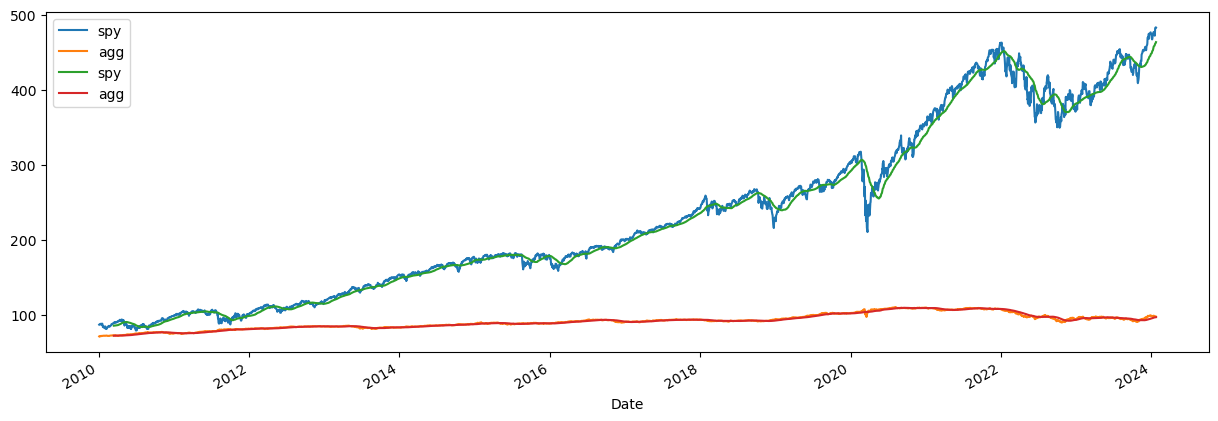

In [6]:
plot = bt.merge(data, sma).plot(figsize=(15, 5))

Now, let's use that **Boolean logic** to create our **signal**. When do we buy? When the price is above the 50-day moving average. Just compare the two DataFrames and get a new one full of *True* and *False* values! We'll call that DataFrame **signal**. 

In [7]:
signal = data > sma
print(type(signal))

signal

<class 'pandas.core.frame.DataFrame'>


,spy,agg
Date,,
2010-01-04,False,False
2010-01-05,False,False
2010-01-06,False,False
2010-01-07,False,False
2010-01-08,False,False
...,...,...
2024-01-17,True,True
2024-01-18,True,True
2024-01-19,True,True


We can now create a **new strategy** with that logic. The new strategy is called **above50sma** and is saved in the **sma50** object. Notice the new first line that has the `.SelectWhere` method. This is going to select securities where `signal == True`.

In [8]:
sma50 = bt.Strategy('above50sma', [bt.algos.SelectWhere(signal),
                                   bt.algos.WeighEqually(),
                                   bt.algos.Rebalance()])

Take a look at this discussion on [strategy trees](http://pmorissette.github.io/bt/tree.html) for more on how to use `bt` to combine different algorithms. 

A real strategy might incorporate **hundreds of signals from all types of data sources**. 

### Step 3 - Backtest your strategy

Once you have your strategy object, you can backtest on your data on a particular strategy. You feed the function `bt.Backtest` your strategy and your data. This creates a **test** object. Then, you use `bt.run` on that object to get your **results**.

In [9]:
test_ew = bt.Backtest(ew, data)
res_ew = bt.run(test_ew)

print(type(test_ew))
print(type(res_ew))

<class 'bt.backtest.Backtest'>
<class 'bt.backtest.Result'>


Note the arguments for the backtest function. You give it the strategy **ew** and your **data**. Remember, you data are prices for the securities. The backtest is using these prices to generate returns.

Let's run the backtest and results for the moving average strategy as well.

In [10]:
test_sma50 = bt.Backtest(sma50, data)
res_sma50  = bt.run(test_sma50)

With the results object, we can plot the value of the strategy (starting at 100) and look at some descriptive statistics. 

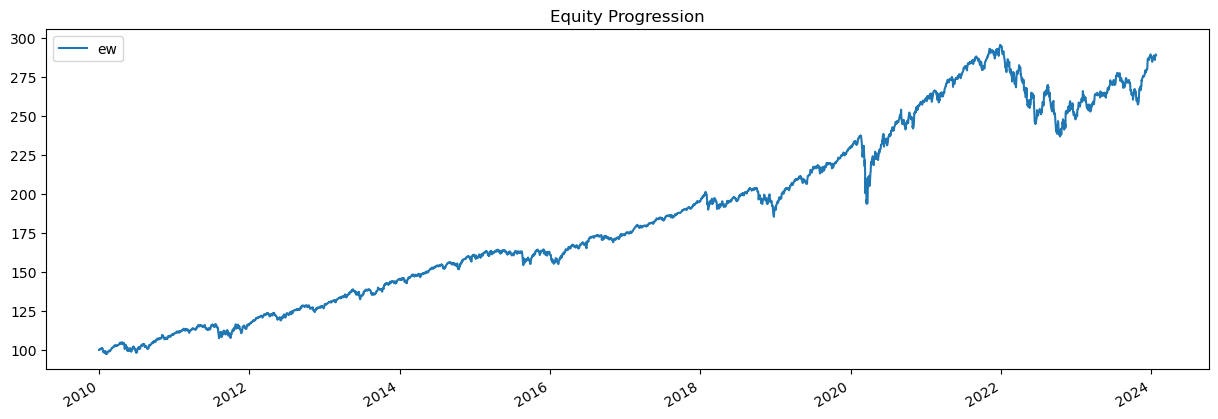

In [11]:
res_ew.plot();

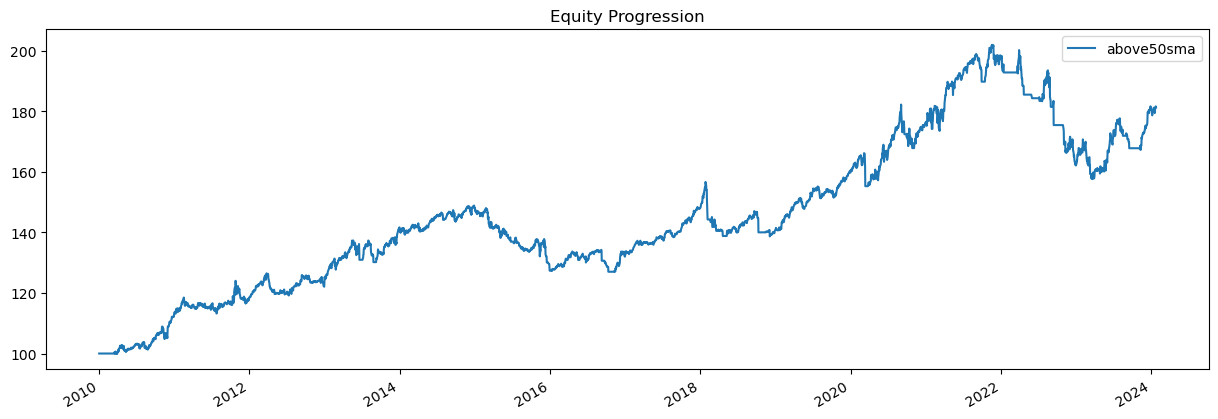

In [12]:
res_sma50.plot();

In [13]:
res_ew.display()

Stat                 ew
-------------------  ----------
Start                2010-01-03
End                  2024-01-23
Risk-free rate       0.00%

Total Return         188.64%
Daily Sharpe         0.90
Daily Sortino        1.39
CAGR                 7.83%
Max Drawdown         -19.87%
Calmar Ratio         0.39

MTD                  0.12%
3m                   11.08%
6m                   4.62%
YTD                  0.12%
1Y                   11.44%
3Y (ann.)            2.99%
5Y (ann.)            7.97%
10Y (ann.)           7.09%
Since Incep. (ann.)  7.83%

Daily Sharpe         0.90
Daily Sortino        1.39
Daily Mean (ann.)    7.94%
Daily Vol (ann.)     8.83%
Daily Skew           -0.72
Daily Kurt           14.02
Best Day             4.77%
Worst Day            -6.63%

Monthly Sharpe       0.99
Monthly Sortino      1.80
Monthly Mean (ann.)  8.07%
Monthly Vol (ann.)   8.19%
Monthly Skew         -0.30
Monthly Kurt         1.06
Best Month           7.57%
Worst Month          -6.68%

Yearly Shar

In [14]:
res_sma50.display()

Stat                 above50sma
-------------------  ------------
Start                2010-01-03
End                  2024-01-23
Risk-free rate       0.00%

Total Return         81.22%
Daily Sharpe         0.59
Daily Sortino        0.86
CAGR                 4.32%
Max Drawdown         -21.95%
Calmar Ratio         0.20

MTD                  0.11%
3m                   8.01%
6m                   2.84%
YTD                  0.11%
1Y                   8.93%
3Y (ann.)            0.06%
5Y (ann.)            5.16%
10Y (ann.)           2.55%
Since Incep. (ann.)  4.32%

Daily Sharpe         0.59
Daily Sortino        0.86
Daily Mean (ann.)    4.54%
Daily Vol (ann.)     7.73%
Daily Skew           -1.07
Daily Kurt           10.57
Best Day             3.48%
Worst Day            -4.35%

Monthly Sharpe       0.57
Monthly Sortino      0.93
Monthly Mean (ann.)  4.58%
Monthly Vol (ann.)   8.01%
Monthly Skew         -0.59
Monthly Kurt         1.16
Best Month           6.69%
Worst Month          -7.97%

Year

You'd have been much better off equally weighting the two indices and rebalancing each month!

Finally, notice what we **did not do**. We were just testing a simple strategy. **We didn't do anything with in-sample vs. out-of-sample data**. We weren't training a model using one set of data in a backtest and then testing it on some data that we withheld from the strategy development algorithm. When you're developing a model and not just stating that you're using one, like our 50-day moving average, things get more complicated. 

## Other tools

This `bt package` is just one of many out there. I chose it because it seems to be more actively maintained.

There are also a set of tools from the now defunct [Quantopian platform](https://www.bloomberg.com/news/articles/2020-12-16/quant-trading-platform-quantopian-closes-down). I believe that some former Quantopian engineers are still working on the tools.

These include [zipline](https://zipline.ml4trading.io), a backtesting tool, [alphalens](https://alphalens.ml4trading.io), for looking at sources of risk and return, and [pyfolio](https://pyfolio.ml4trading.io), which creates performance tear sheets.

There's also a package simply called [Backtesting](https://pypi.org/project/Backtesting/). 

Trading firms and hedge funds will have developed most of this in-house. For example, [Goldman Sachs has their own tools](https://developer.gs.com/docs/gsquant/). 